# TEST on real and reciprocal spaces definitions

In [1]:
import numpy as np
from pbcpy.grid import Grid, Grid_Space as gs, Grid_Function as gf, Grid_Function_Reciprocal as gfr
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## defining grid attributes, at, nr

In [2]:
at = np.identity(3)
at[0,0]=2
at

array([[ 2.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [3]:
nr = [1001,1,1]

## numpy fft convention:

### fft
$$
g(\mathbf{z}) = F[f](\mathbf{z})	=	\int f ( \mathbf{x} ) e^{-2\pi i \mathbf{x} \cdot \mathbf{z}} \frac{N_x N_y N_z}{\Omega}d^3\mathbf{x}
$$

### ifft
\begin{eqnarray}
f(\mathbf{x})	=	F_I[g](\mathbf{x}) &=& \frac{1}{N_x N_y N_z}\int g ( \mathbf{z} ) e^{2\pi i \mathbf{z} \cdot \mathbf{x}}\frac{N_x N_y N_z}{\Omega_z} d^3\mathbf{z} \\
&=& \frac{1}{N_x N_y N_z}\int F[f] ( \mathbf{z} ) e^{2\pi i \mathbf{z} \cdot \mathbf{x}}\frac{N_x N_y N_z}{\Omega_z} d^3\mathbf{z}
\end{eqnarray}

where $d^3\mathbf{z} = \frac{\Omega_z}{N_x N_y N_z}$ and $d^3\mathbf{x} = \frac{\Omega}{N_x N_y N_z}$

## fft convention we need to use (physics definition):

### fft
$$
g'(\mathbf{z'}) = F'[f](\mathbf{z'})	= 	\int f ( \mathbf{x} ) e^{-i \mathbf{x} \cdot \mathbf{z'}} d^3\mathbf{x}
$$

### ifft
\begin{eqnarray}
f(\mathbf{x})	=	F_I'[g'](\mathbf{x}) &=& \frac{1}{\left(2\pi\right)^3} \int g' ( \mathbf{z'} ) e^{i \mathbf{z'} \cdot \mathbf{x}}d^3\mathbf{z'}\\ 
&=& \frac{1}{\left(2\pi\right)^3} \int F'[f] ( \mathbf{z'} ) e^{i \mathbf{z'} \cdot \mathbf{x}}d^3\mathbf{z'}
\end{eqnarray}

## changing coordinates (fft)

$\mathbf{z'} = 2 \pi \mathbf{z''}$

$F'[f](\mathbf{z'})	=	\sum_{ijk} f ( \mathbf{x}) e^{-i \mathbf{x} \cdot \mathbf{z'}}d^3\mathbf{x}$

$\Downarrow$

$F'[f](2\pi\mathbf{z''})	=	\frac{\Omega}{N_x N_y N_z}\sum_{ijk} f ( \mathbf{x}) e^{-i 2\pi\mathbf{x} \cdot \mathbf{z''}}\frac{N_x N_y N_z}{\Omega}d^3(\mathbf{x})$

$\Downarrow$

$F'[f](2\pi\mathbf{z''})	=	\frac{\Omega}{N_x N_y N_z}\sum_{ijk} f ( \mathbf{x}) e^{-i 2\pi\mathbf{x} \cdot \mathbf{z''}}\frac{N_x N_y N_z}{\Omega}d^3(\mathbf{x}) = \frac{\Omega}{N_x N_y N_z} F[f](\mathbf{z''})$

$\Downarrow$

so, given a function $f(\mathbf{x})$ in the real space,
in order to get the right fourier transform $F'[f](\mathbf{z'})$ on the reciprocal space
we have the following relation:

$\Downarrow$

$F'[f](2\pi\mathbf{z''})	=	\frac{\Omega}{N_x N_y N_z}\sum_{ijk} f ( \mathbf{x}) e^{-i 2\pi\mathbf{x} \cdot \mathbf{z''}}\frac{N_x N_y N_z}{\Omega}d^3(\mathbf{x}) = \frac{\Omega}{N_x N_y N_z} F[f](\mathbf{z''})$

$\Downarrow$

so, given a function $f(\mathbf{x})$ in the real space,
in order to get the right fourier transform $F'[f](\mathbf{z'})$ on the reciprocal space
we have the following relation:

$\Downarrow$

$F'[f](2\pi\mathbf{z''})	=	\frac{\Omega}{N_x N_y N_z}\sum_{ijk} f ( \mathbf{x}) e^{-i 2\pi\mathbf{x} \cdot \mathbf{z''}}\frac{N_x N_y N_z}{\Omega}d^3(\mathbf{x}) = \frac{\Omega}{N_x N_y N_z} F[f](\mathbf{z''})$

$\Downarrow$

so, given a function $f(\mathbf{x})$ in the real space,
in order to get the right fourier transform $F'[f](\mathbf{z'})$ on the reciprocal space
we have the following relation:

$F'[f](\mathbf{z'}) = \frac{\Omega}{N_x N_y N_z} F[f](\frac{\mathbf{z'}}{2\pi})$

so we have to evaluate the numpy fft on a $\frac{1}{2\pi}$ scaled reciprocal space and multiply it for $\frac{\Omega}{N_x N_y N_z} = dV$, the volume of a subcell of the grid.

## changing coordinates (ifft)

$\mathbf{z'} = 2 \pi \mathbf{z''}$

$f(\mathbf{x})	=	\frac{1}{\left(2\pi\right)^3} \sum_{ijk} F'[f] ( \mathbf{z'} ) e^{i \mathbf{z'} \cdot \mathbf{x}}d^3\mathbf{z'}	=	\frac{1}{\left(2\pi\right)^3} \sum_{ijk} g' ( \mathbf{z'} ) e^{i \mathbf{z'} \cdot \mathbf{x}}d^3\mathbf{z'}$

$\Downarrow$

$f(\mathbf{x})	=	\frac{1}{\left(2\pi\right)^3} \sum_{ijk} g' (2\pi \mathbf{z''} ) e^{i 2\pi\mathbf{z''} \cdot \mathbf{x}}d^3(2\pi\mathbf{z''})$

$\Downarrow$

$f(\mathbf{x})	=	\frac{\Omega_{z''}}{N_x N_y N_z} \sum_{ijk} g' (2\pi \mathbf{z''} ) e^{i 2\pi\mathbf{z''} \cdot \mathbf{x}}\frac{N_x N_y N_z}{\Omega_{z''}}d^3\mathbf{z''}$

$\Downarrow$

$g''(\mathbf{z''}) := g' (2\pi \mathbf{z''} ) = F'[f](2\pi\mathbf{z''}) = \frac{\Omega}{N_x N_y N_z} F[f](\mathbf{z''})$

$f(\mathbf{x})	=	\frac{\Omega_{z''}}{N_x N_y N_z} \sum_{ijk} g'' (\mathbf{z''} ) e^{i 2\pi\mathbf{z''} \cdot \mathbf{x}}\frac{N_x N_y N_z}{\Omega_{z''}}d^3\mathbf{z''}$

$\Downarrow$

$f(\mathbf{x})	=	\Omega_{z''} F_I[g''](\mathbf{x})$

we have $\Omega_{z''} = \frac{N_x N_y N_z}{\Omega} = \frac{1}{dV}$

$\Downarrow$

$f(\mathbf{x})	=	\frac{1}{dV} F_I[g''](\mathbf{x})$

and $g''$ has to be evaluated on the physical reciprocal space but the ifft domain is the $\frac{1}{2\pi}$ scaled reciprocal space

In [4]:
grid = gs(at, nr)
gf_func = gf(grid)
gf_func.ndim

1

In [5]:
gf_func.grid_space.reciprocal_grid.at

array([[ 3144.73424624,     0.        ,     0.        ],
       [    0.        ,     6.28318531,     0.        ],
       [    0.        ,     0.        ,     6.28318531]])

#### grid.reciprocal_grid.r are points on the reciprocal grid
#### grid.reciprocal_grid.dist_values() is a ndarray with distances of points on reciprocal grid from 0

In [6]:
invgrid_g = grid.reciprocal_grid.r

In [7]:
invgrid_gg = grid.reciprocal_grid.dist_values()

#### dens is a gaussian centered in [500,0,0]

$$f(r) = \frac{1}{\alpha \sqrt{(2\pi)}} e^{\frac{-\left|r-c\right|^2}{2\alpha^2}}$$

#### center_array = c is in crystal coordinates

In [8]:
alpha=0.1

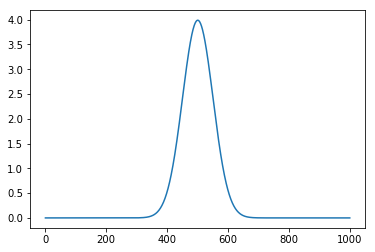

In [9]:
dens = gf_func.gaussian(alpha=alpha,center_array=[0.5,0.,0.])
plt.plot(dens.values[:,0,0])
plt.show()

densFFT is the fourier transform of dens, is a Grid_Function_Reciprocal object

In [10]:
densFFT = dens.fft()

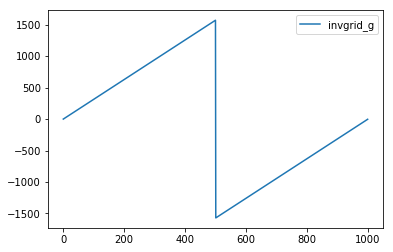

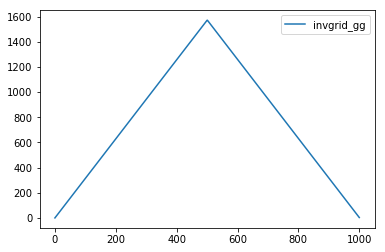

In [11]:
plt.plot(invgrid_g[:,0,0,0],label='invgrid_g')
plt.legend()
plt.show()
plt.plot(invgrid_gg[:,0,0],label='invgrid_gg')
plt.legend()
plt.show()

In [12]:
center = grid.grid.crystal_coord_array([0.5,0.,0.]).to_cart()
print(center)

[ 1.  0.  0.]


### The FFT of the Gaussian function is
$$
F\left[\frac{1}{\alpha \sqrt{(2\pi)}} e^{\frac{-\left|r-c\right|^2}{2\alpha^2}}\right] = e^{-\frac{1}{2}(\alpha G)^2} \cdot e^{-irc}
$$

In [13]:
my_densFFT = np.exp(-(invgrid_gg[:30,0,0]*alpha)**2/2.0)*np.exp(-invgrid_g[:30,0,0,0]*center[0]*1.0j)

In [14]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,4))

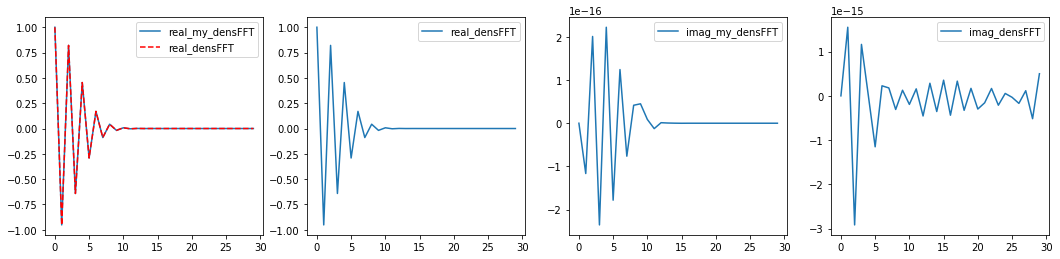

In [15]:
ax1.plot(np.real(my_densFFT),label='real_my_densFFT')
ax1.plot(np.real(densFFT.values[:30,0,0]),label='real_densFFT',color='red',linestyle='dashed')
ax2.plot(np.real(densFFT.values[:30,0,0]),label='real_densFFT')
ax3.plot(np.imag(my_densFFT),label='imag_my_densFFT')
ax4.plot(np.imag(densFFT.values[:30,0,0]),label='imag_densFFT')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

In [16]:
densFFT_IFFT = densFFT.ifft()

In [17]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,4))

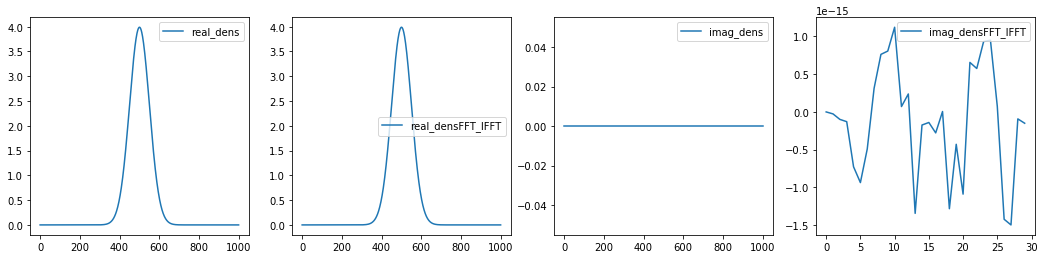

In [18]:
ax1.plot(np.real(dens.values[:,0,0]),label='real_dens')
ax2.plot(np.real(densFFT_IFFT.values[:,0,0]),label='real_densFFT_IFFT')
ax3.plot(np.imag(dens.values[:,0,0]),label='imag_dens')
ax4.plot(np.imag(densFFT_IFFT.values[:30,0,0]),label='imag_densFFT_IFFT')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()